<a href="https://colab.research.google.com/github/doanthuan/CS2225.CH1501/blob/master/AgePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import argparse
import cv2
import os
from google.colab.patches import cv2_imshow
import urllib
from skimage import io
import urllib.request

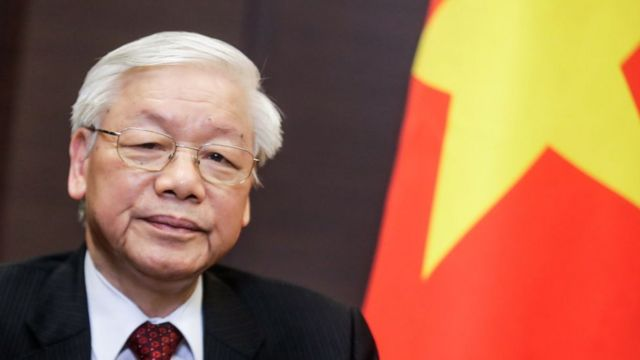

In [18]:
args = dict()
args["img_path"]  = "/content/sample_data/test1.jpg"
image = cv2.imread(args["img_path"])
cv2_imshow(image)

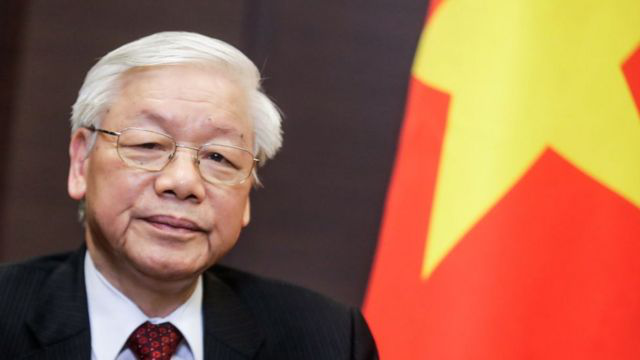

In [26]:
image = io.imread("https://ichef.bbci.co.uk/news/640/cpsprodpb/4C57/production/_106834591_gettyimages-1027595692.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image)

In [30]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


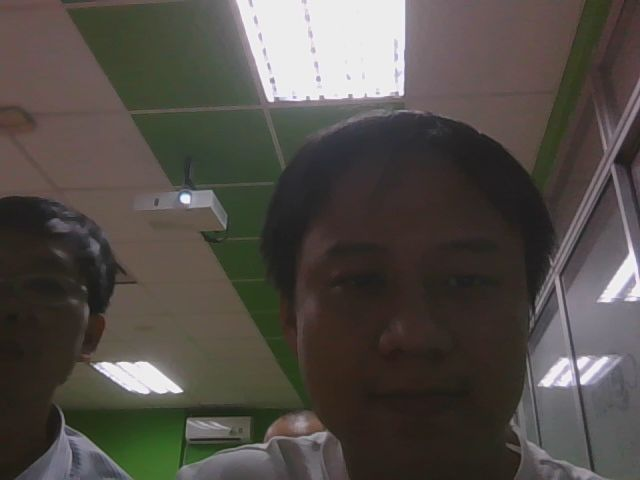

In [55]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

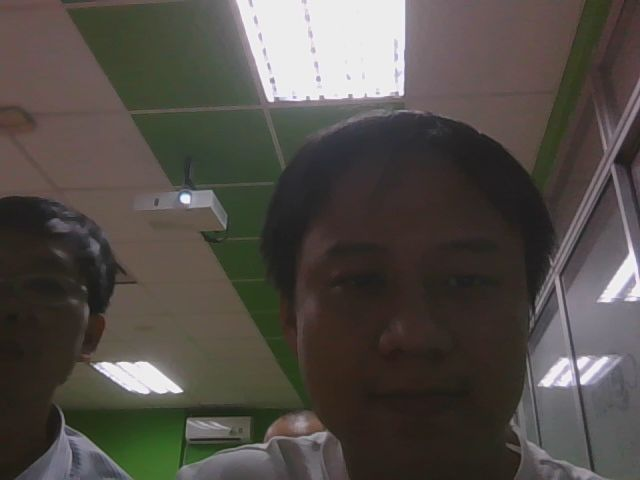

In [56]:
image = cv2.imread(filename)
cv2_imshow(image)

In [37]:
# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)
# root_dir = '/content/drive/'

Mounted at /content/drive


In [43]:
!pwd
!mkdir opencv-age-detection
!mkdir opencv-age-detection/age_detector
!mkdir opencv-age-detection/face_detector

/content


In [46]:

urllib.request.urlretrieve('https://drive.google.com/uc?id=1PNKZTOWG8qMoeYjUL6uATxwZjoqmbz4s', '/content/opencv-age-detection/age_detector/age_deploy.prototxt')

('/content/opencv-age-detection/age_detector/age_deploy.prototxt',
 <http.client.HTTPMessage at 0x7f719d4a5198>)

In [ ]:
urllib.request.urlretrieve('https://drive.google.com/uc?id=1PNKZTOWG8qMoeYjUL6uATxwZjoqmbz4s', '/content/opencv-age-detection/age_detector/age_deploy.prototxt')

In [38]:
args["face"] = "/content/drive/My Drive/colab/opencv-age-detection/face_detector"
args["age"] = "/content/drive/My Drive/colab/opencv-age-detection/age_detector"
# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = os.path.sep.join([args["face"], "deploy.prototxt"])
weightsPath = os.path.sep.join([args["face"],
	"res10_300x300_ssd_iter_140000.caffemodel"])
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)
# load our serialized age detector model from disk
print("[INFO] loading age detector model...")
prototxtPath = os.path.sep.join([args["age"], "age_deploy.prototxt"])
weightsPath = os.path.sep.join([args["age"], "age_net.caffemodel"])
ageNet = cv2.dnn.readNet(prototxtPath, weightsPath)

[INFO] loading face detector model...
[INFO] loading age detector model...


In [77]:
# load the input image and construct an input blob for the image
args["image"] = "/content/photo.jpg"
args["confidence"] = 0.2
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
faceNet.setInput(blob)
detections = faceNet.forward()

[INFO] computing face detections...


In [78]:
# define the list of age buckets our age detector will predict
AGE_BUCKETS = ["(0-2)", "(4-6)", "(8-12)", "(15-20)", "(25-32)",
	"(38-43)", "(48-53)", "(60-100)"]

0.27077118
[INFO] (25-32): 91.41%
0.13942306
0.12828536
0.12193984
0.11279703
0.11026585
0.10499853
0.09700837
0.09606201
0.09443928
0.0938174
0.0917819
0.09091396
0.08940993
0.088048846
0.08683187
0.085954234
0.08408279
0.08098823
0.07957413
0.07956148
0.07915503
0.07903183
0.078624696
0.07804325
0.07758133
0.07745242
0.07728383
0.07725192
0.07675138
0.07647168
0.076432474
0.07621677
0.07585748
0.07580952
0.075432524
0.07515612
0.07507004
0.07471161
0.074291565
0.074204415
0.07407303
0.07397448
0.073813476
0.07357661
0.07342016
0.07340103
0.07333542
0.07322679
0.07287815
0.07277709
0.072654985
0.07247976
0.07214042
0.07198847
0.07194551
0.07169779
0.07167359
0.07159381
0.07156341
0.071520075
0.07136375
0.07134951
0.071283154
0.071267225
0.071172506
0.071151674
0.071084686
0.07094889
0.0709157
0.07091388
0.07091343
0.070626125
0.07056398
0.07052877
0.07049766
0.07047992
0.07043873
0.070377156
0.07034831
0.07026347
0.07023873
0.07010214
0.07006896
0.07004586
0.06998897
0.06991665
0.0699

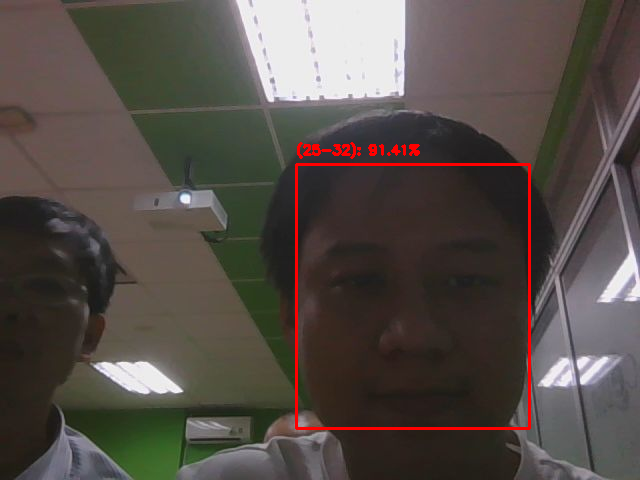

In [79]:
# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]
	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > args["confidence"]:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# extract the ROI of the face and then construct a blob from
		# *only* the face ROI
		face = image[startY:endY, startX:endX]
		faceBlob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),
			(78.4263377603, 87.7689143744, 114.895847746),
			swapRB=False)
    # make predictions on the age and find the age bucket with
		# the largest corresponding probability
		ageNet.setInput(faceBlob)
		preds = ageNet.forward()
		i = preds[0].argmax()
		age = AGE_BUCKETS[i]
		ageConfidence = preds[0][i]
		# display the predicted age to our terminal
		text = "{}: {:.2f}%".format(age, ageConfidence * 100)
		print("[INFO] {}".format(text))
		# draw the bounding box of the face along with the associated
		# predicted age
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
# display the output image
cv2_imshow( image)

array([[[[0.        , 1.        , 0.27077118, ..., 0.34172347,
          0.82737887, 0.89252675],
         [0.        , 1.        , 0.13942306, ..., 0.47985923,
          1.3221998 , 1.290815  ],
         [0.        , 1.        , 0.12828536, ..., 3.9975517 ,
          0.83394694, 4.986656  ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)